In [1]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt

w[0]: 0.393906  b: -0.031804


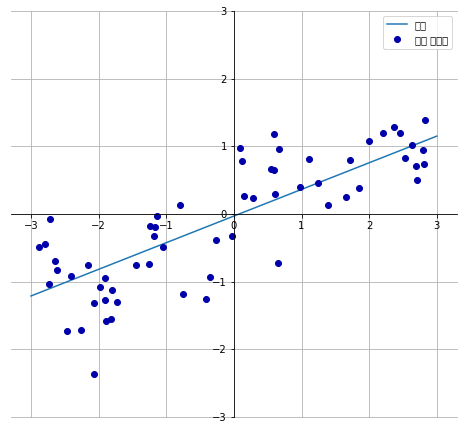

In [2]:
mglearn.plots.plot_linear_regression_wave()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X,y=mglearn.datasets.make_wave(n_samples=60)

X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=42)
lr=LinearRegression().fit(X_train,y_train)
print(lr.coef_, lr.intercept_)

[0.39390555] -0.031804343026759746


In [4]:
print("train set score :{:.2f}".format(lr.score(X_train, y_train)))
print("test set score :{:.2f}".format(lr.score(X_test, y_test)))

train set score :0.67
test set score :0.66


In [5]:

X,y=mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=0)
lr=LinearRegression().fit(X_train,y_train)
print("train set score :{:.2f}".format(lr.score(X_train, y_train)))
print("test set score :{:.2f}".format(lr.score(X_test, y_test)))

train set score :0.95
test set score :0.61


In [6]:
from sklearn.linear_model import Ridge

ridge=Ridge().fit(X_train, y_train)
print("train set score : {:.2f}".format(ridge.score(X_train, y_train)))
print("test set score :{:.2f}".format(ridge.score(X_test, y_test)))

train set score : 0.89
test set score :0.75


In [7]:
ridge10=Ridge(alpha=10).fit(X_train, y_train)
print("train set score : {:.2f}".format(ridge10.score(X_train, y_train)))
print("test set score :{:.2f}".format(ridge10.score(X_test, y_test)))

train set score : 0.79
test set score :0.64


In [8]:
ridge01=Ridge(alpha=0.1).fit(X_train, y_train)
print("train set score : {:.2f}".format(ridge01.score(X_train, y_train)))
print("test set score :{:.2f}".format(ridge01.score(X_test, y_test)))

train set score : 0.93
test set score :0.77


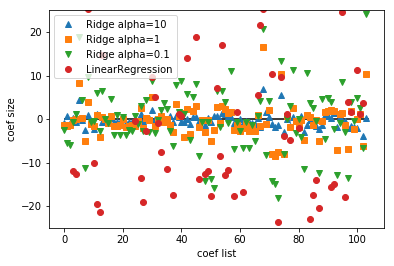

In [9]:
plt.plot(ridge10.coef_,'^',label="Ridge alpha=10")
plt.plot(ridge.coef_,'s',label="Ridge alpha=1")
plt.plot(ridge01.coef_,'v',label="Ridge alpha=0.1")

plt.plot(lr.coef_,'o',label="LinearRegression")
plt.xlabel("coef list")
plt.ylabel("coef size")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

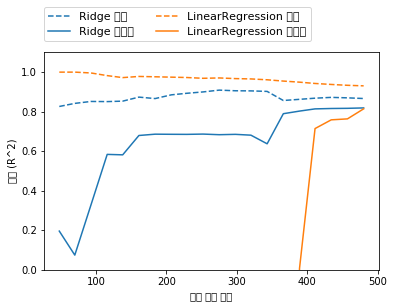

In [10]:
mglearn.plots.plot_ridge_n_samples()

In [11]:
from sklearn.linear_model import Lasso
lasso=Lasso().fit(X_train, y_train)
print("train set score : {:.2f}".format(lasso.score(X_train,y_train)))
print("test set score : {:.2f}".format(lasso.score(X_test,y_test)))
print("num feature : {:}".format(np.sum(lasso.coef_ !=0)))

train set score : 0.29
test set score : 0.21
num feature : 4


In [12]:
lasso001=Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("train set score : {:.2f}".format(lasso001.score(X_train,y_train)))
print("test set score : {:.2f}".format(lasso001.score(X_test,y_test)))
print("num feature : {:}".format(np.sum(lasso001.coef_ !=0)))

train set score : 0.90
test set score : 0.77
num feature : 33


In [13]:
lasso00001=Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("train set score : {:.2f}".format(lasso00001.score(X_train,y_train)))
print("test set score : {:.2f}".format(lasso00001.score(X_test,y_test)))
print("num feature : {:}".format(np.sum(lasso00001.coef_ !=0)))

train set score : 0.95
test set score : 0.64
num feature : 94


Text(0,0.5,'coef size')

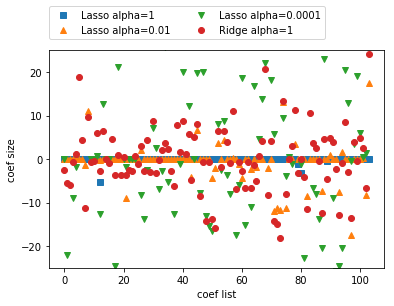

In [18]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=1")
plt.legend(ncol=2,loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("coef list")
plt.ylabel("coef size")

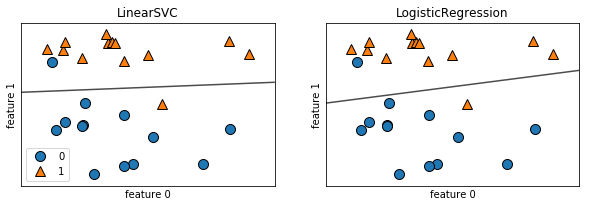

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y=mglearn.datasets.make_forge()

fig, axes= plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()],axes):
    clf=model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend()

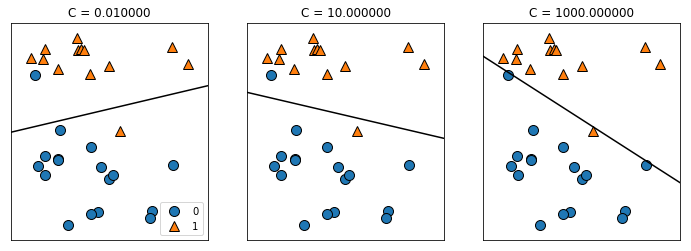

In [25]:
mglearn.plots.plot_linear_svc_regularization()

In [27]:
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
X_train, X_test, y_train, y_test= train_test_split(cancer.data,cancer.target, stratify=cancer.target, random_state=42)
logreg=LogisticRegression().fit(X_train, y_train)
print("train set score : {:.3f}".format(logreg.score(X_train,y_train)))
print("test set score : {:.3f}".format(logreg.score(X_test,y_test)))

train set score : 0.955
test set score : 0.958


In [28]:
logreg100=LogisticRegression(C=100).fit(X_train, y_train)
print("train set score : {:.3f}".format(logreg100.score(X_train,y_train)))
print("test set score : {:.3f}".format(logreg100.score(X_test,y_test)))

train set score : 0.972
test set score : 0.965


In [29]:
logreg001=LogisticRegression(C=0.01).fit(X_train, y_train)
print("train set score : {:.3f}".format(logreg001.score(X_train,y_train)))
print("test set score : {:.3f}".format(logreg001.score(X_test,y_test)))

train set score : 0.934
test set score : 0.930


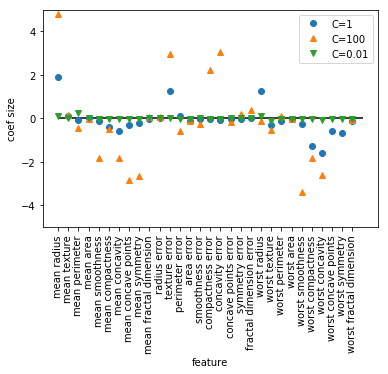

In [31]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")

plt.xticks(range(cancer.data.shape[1]),cancer.feature_names, rotation =90)
plt.hlines(0,0, cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("feature")
plt.ylabel("coef size")
plt.legend()

C=0.001 l1 logistic train accuracy: 0.91
C=0.001 l1 logistic test accuracy: 0.92
C=1.000 l1 logistic train accuracy: 0.96
C=1.000 l1 logistic test accuracy: 0.96
C=100.000 l1 logistic train accuracy: 0.99
C=100.000 l1 logistic test accuracy: 0.98


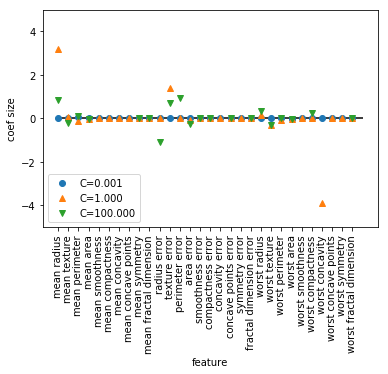

In [34]:
for C,marker in zip([0.001,1,100],['o','^','v']):
    lr_l1=LogisticRegression(C=C,penalty='l1').fit(X_train,y_train)
    print("C={:.3f} l1 logistic train accuracy: {:.2f}".format(C,lr_l1.score(X_train,y_train)))
    print("C={:.3f} l1 logistic test accuracy: {:.2f}".format(C,lr_l1.score(X_test,y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))


plt.xticks(range(cancer.data.shape[1]),cancer.feature_names, rotation =90)
plt.hlines(0,0, cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("feature")
plt.ylabel("coef size")
plt.legend(loc=3)

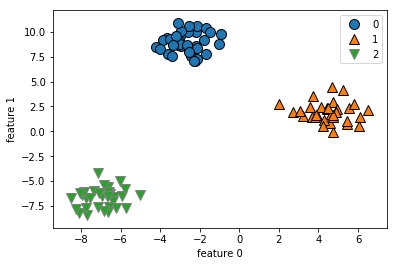

In [35]:
from sklearn.datasets import make_blobs
X, y= make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend()

In [36]:
linear_svm = LinearSVC().fit(X, y)
print(linear_svm.coef_.shape)
print(linear_svm.intercept_.shape)

(3, 2)
(3,)


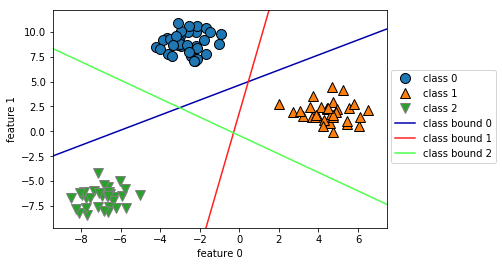

In [40]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line=np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line *coef[0]+intercept) / coef[1], c=color)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(['class 0','class 1','class 2','class bound 0','class bound 1','class bound 2'],loc=[1.01,0.3])

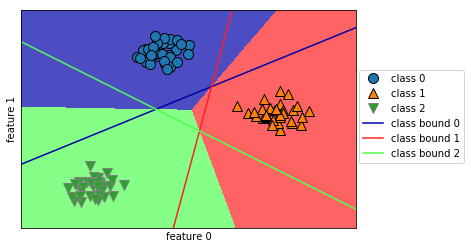

In [45]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line=np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line *coef[0]+intercept) / coef[1], c=color)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(['class 0','class 1','class 2','class bound 0','class bound 1','class bound 2'],loc=[1.01,0.3])

In [47]:
logreg=LogisticRegression().fit(X_train,y_train).predict(X_test)